In [15]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from cdlib import algorithms
import dynetx as dn
import calendar
from cdlib import algorithms, evaluation
from cdlib import NodeClustering
from scipy import signal

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'infomap', 'wurlitzer', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [49]:
#to change font size
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [20]:
m = list(calendar.month_abbr)
m.pop(0)
m_13 = list(calendar.month_abbr)
del m_13[:4]
mm = m_13+m+m+m+m

for i in range(len(mm)):
    if i < 9:
        mm[i] = mm[i]+' 13'
    if i >= 9 and i <21:
        mm[i] = mm[i]+' 14'
    if i >= 21 and i <33:
        mm[i] = mm[i]+' 15'
    if i >= 33 and i <45:
        mm[i] = mm[i]+' 16'
    if i >= 45:
        mm[i] = mm[i]+' 17'

m_xvii = mm

m_18 = list(calendar.month_abbr)
del m_18[0:6]
m_22 = list(calendar.month_abbr)
del m_22[9:]
del m_22[0:2]

mm = m_18+m+m+m+m_22

for i in range(len(mm)):
    if i < 7:
        mm[i] = mm[i]+' 18'
    if i >= 7 and i <19:
        mm[i] = mm[i]+' 19'
    if i >= 19 and i <31:
        mm[i] = mm[i]+' 20'
    if i >= 31 and i <43:
        mm[i] = mm[i]+' 21'
    if i >= 43:
        mm[i] = mm[i]+' 22'

m_xviii = mm

m_tot = m_xvii+m_xviii
print(m_tot)
print(len(m_tot))

['Apr 13', 'May 13', 'Jun 13', 'Jul 13', 'Aug 13', 'Sep 13', 'Oct 13', 'Nov 13', 'Dec 13', 'Jan 14', 'Feb 14', 'Mar 14', 'Apr 14', 'May 14', 'Jun 14', 'Jul 14', 'Aug 14', 'Sep 14', 'Oct 14', 'Nov 14', 'Dec 14', 'Jan 15', 'Feb 15', 'Mar 15', 'Apr 15', 'May 15', 'Jun 15', 'Jul 15', 'Aug 15', 'Sep 15', 'Oct 15', 'Nov 15', 'Dec 15', 'Jan 16', 'Feb 16', 'Mar 16', 'Apr 16', 'May 16', 'Jun 16', 'Jul 16', 'Aug 16', 'Sep 16', 'Oct 16', 'Nov 16', 'Dec 16', 'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17', 'Sep 17', 'Oct 17', 'Nov 17', 'Dec 17', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18', 'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19', 'Jan 20', 'Feb 20', 'Mar 20', 'Apr 20', 'May 20', 'Jun 20', 'Jul 20', 'Aug 20', 'Sep 20', 'Oct 20', 'Nov 20', 'Dec 20', 'Jan 21', 'Feb 21', 'Mar 21', 'Apr 21', 'May 21', 'Jun 21', 'Jul 21', 'Aug 21', 'Sep 21', 'Oct 21', 'Nov 21', 'Dec 21',

In [32]:
nodes = np.load('nodes_xvii.npy')
interactions = np.load('interactions_xvii.npy')
avg_deg = np.load('avg_deg_xvii.npy')
n_comm = np.load('n_comm_xvii.npy')
mod = np.load('mod_xvii.npy')
avg_cc = np.load('avg_cc_xvii.npy')

In [34]:
nodes_tot = np.append(nodes, np.load('nodes_xviii.npy'))
interactions_tot = np.append(interactions,np.load('interactions_xviii.npy'))
avg_deg_tot = np.append(avg_deg,np.load('avg_deg_xviii.npy'))
n_comm_tot = np.append(n_comm,np.load('n_comm_xviii.npy'))
mod_tot = np.append(mod, np.load('mod_xviii.npy'))
avg_cc_tot = np.append(avg_cc, np.load('avg_cc_xviii.npy'))

print(len(nodes_tot))

107


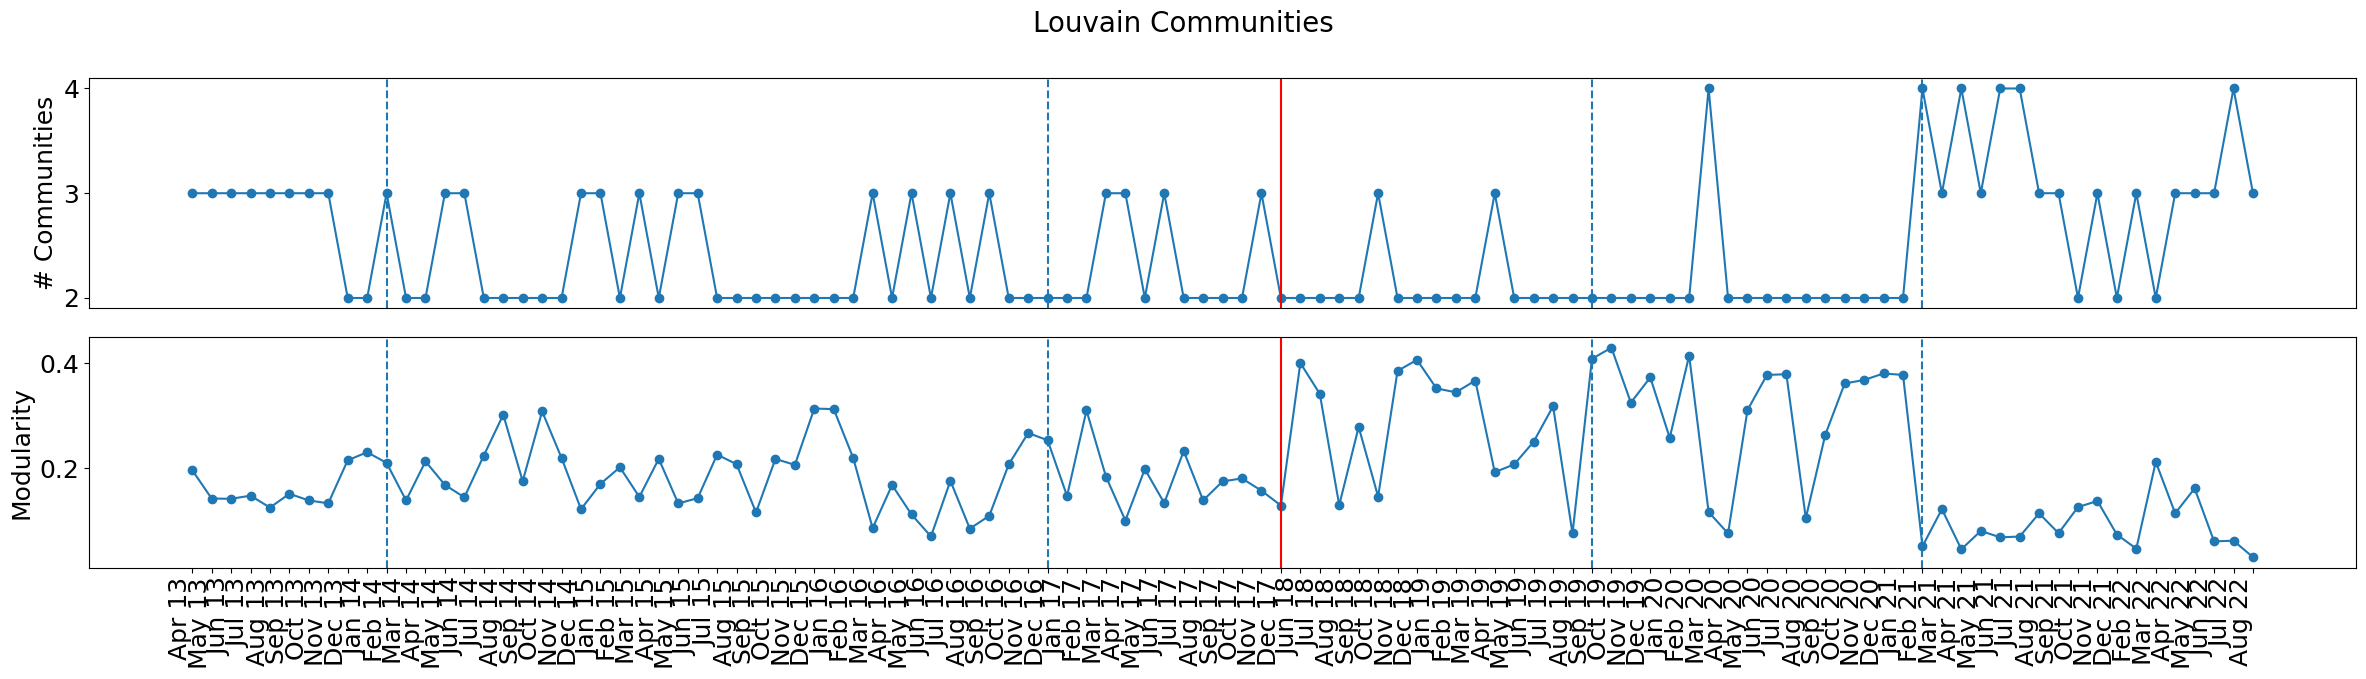

In [106]:
fig = plt.figure(figsize = (24, 7))

ax1 = plt.subplot(211)

plt.suptitle('Louvain Communities')
plt.ylabel('# Communities')
ax1.plot(m_tot, n_comm_tot, '-o')
#plt.xticks(rotation=90, ha='right')
ax1.axes.get_xaxis().set_visible(False)
ax1.axvline(x='Feb 14', linestyle = '--')
ax1.axvline(x='Dec 16', linestyle = '--')
ax1.axvline(x='Dec 17', linestyle = '-', color = 'r')
ax1.axvline(x='Sep 19', linestyle = '--')
ax1.axvline(x='Feb 21', linestyle = '--')
plt.tight_layout()
#plt.savefig("dynamic_n_comm_tot.png")
ax2 = plt.subplot(212, sharex = ax1)


plt.ylabel('Modularity')
plt.plot(m_tot, mod_tot,  '-o')
plt.xticks(rotation=90, ha='right')
plt.axvline(x='Feb 14', linestyle = '--')
plt.axvline(x='Dec 16', linestyle = '--')
plt.axvline(x='Dec 17', linestyle = '-', color = 'r')
plt.axvline(x='Sep 19', linestyle = '--')
plt.axvline(x='Feb 21', linestyle = '--')
plt.tight_layout()

plt.savefig("dynamic_louvain_tot.png")

545.7570093457944
77.20392236434083
88280.72897196261
16621.099823912085


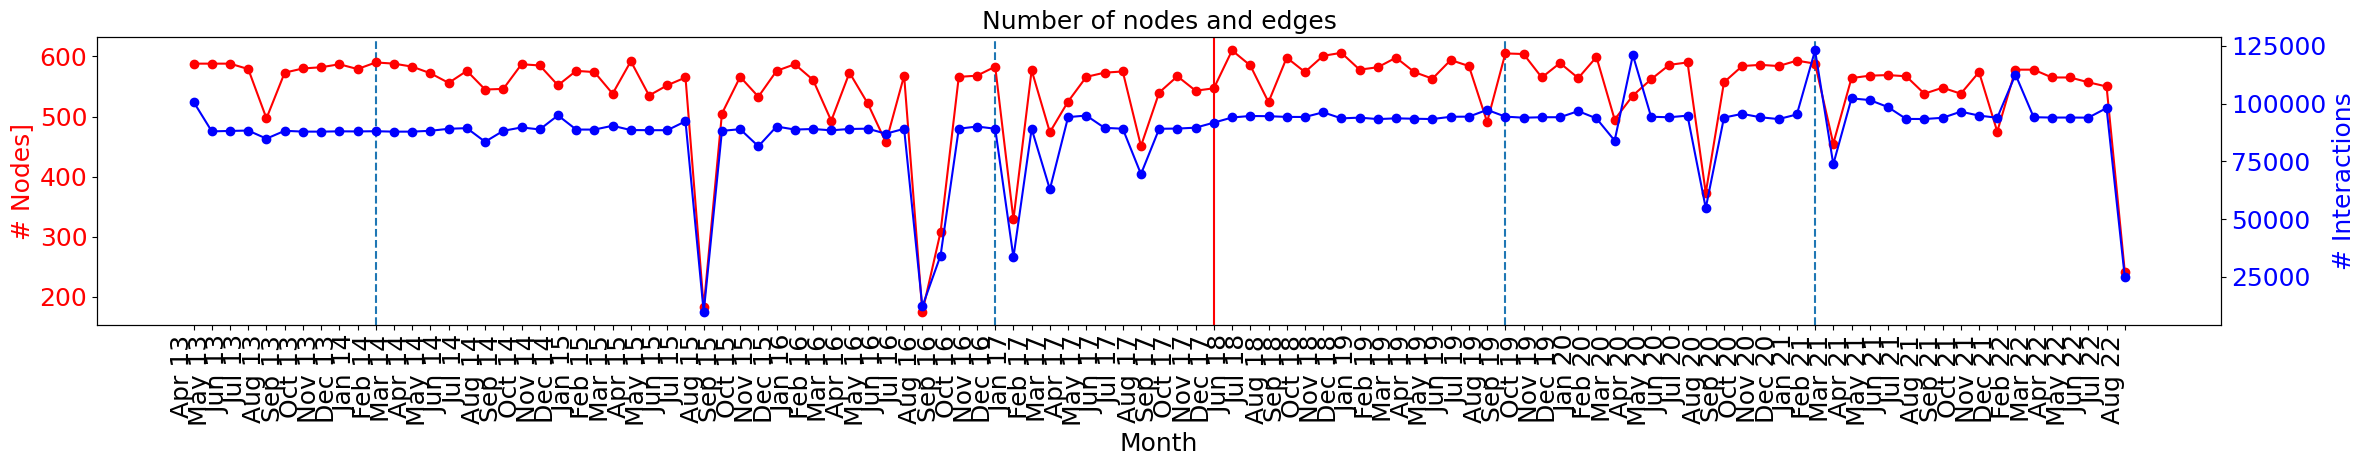

In [121]:
fig = plt.figure(figsize = (24, 5))

ax0 = plt.subplot(111) 
plt.axvline(x='Feb 14', linestyle = '--')
plt.axvline(x='Dec 16', linestyle = '--')
plt.axvline(x='Dec 17', linestyle = '-', color = 'r')
plt.axvline(x='Sep 19', linestyle = '--')
plt.axvline(x='Feb 21', linestyle = '--')
ax0.title.set_text('Number of nodes and edges')

ax0.plot(m_tot, nodes_tot, '-o', color = 'r')
ax0.set_xlabel('Month')
ax0.set_ylabel('# Nodes]', color = 'r')
ax0.tick_params(axis = "y", labelcolor='r')
plt.xticks(rotation=90, ha='right')

ax1=ax0.twinx()
ax1.plot(m_tot, interactions_tot, '-o', color = 'b')
ax1.set_ylabel('# Interactions', color = 'b')
ax1.tick_params(axis = "y", labelcolor = 'b')
plt.tight_layout()


plt.savefig("dynamic_nodes_edges_tot.png")
print(np.mean(nodes_tot))
print(np.std(nodes_tot))

print(np.mean(interactions_tot))
print(np.std(interactions_tot))

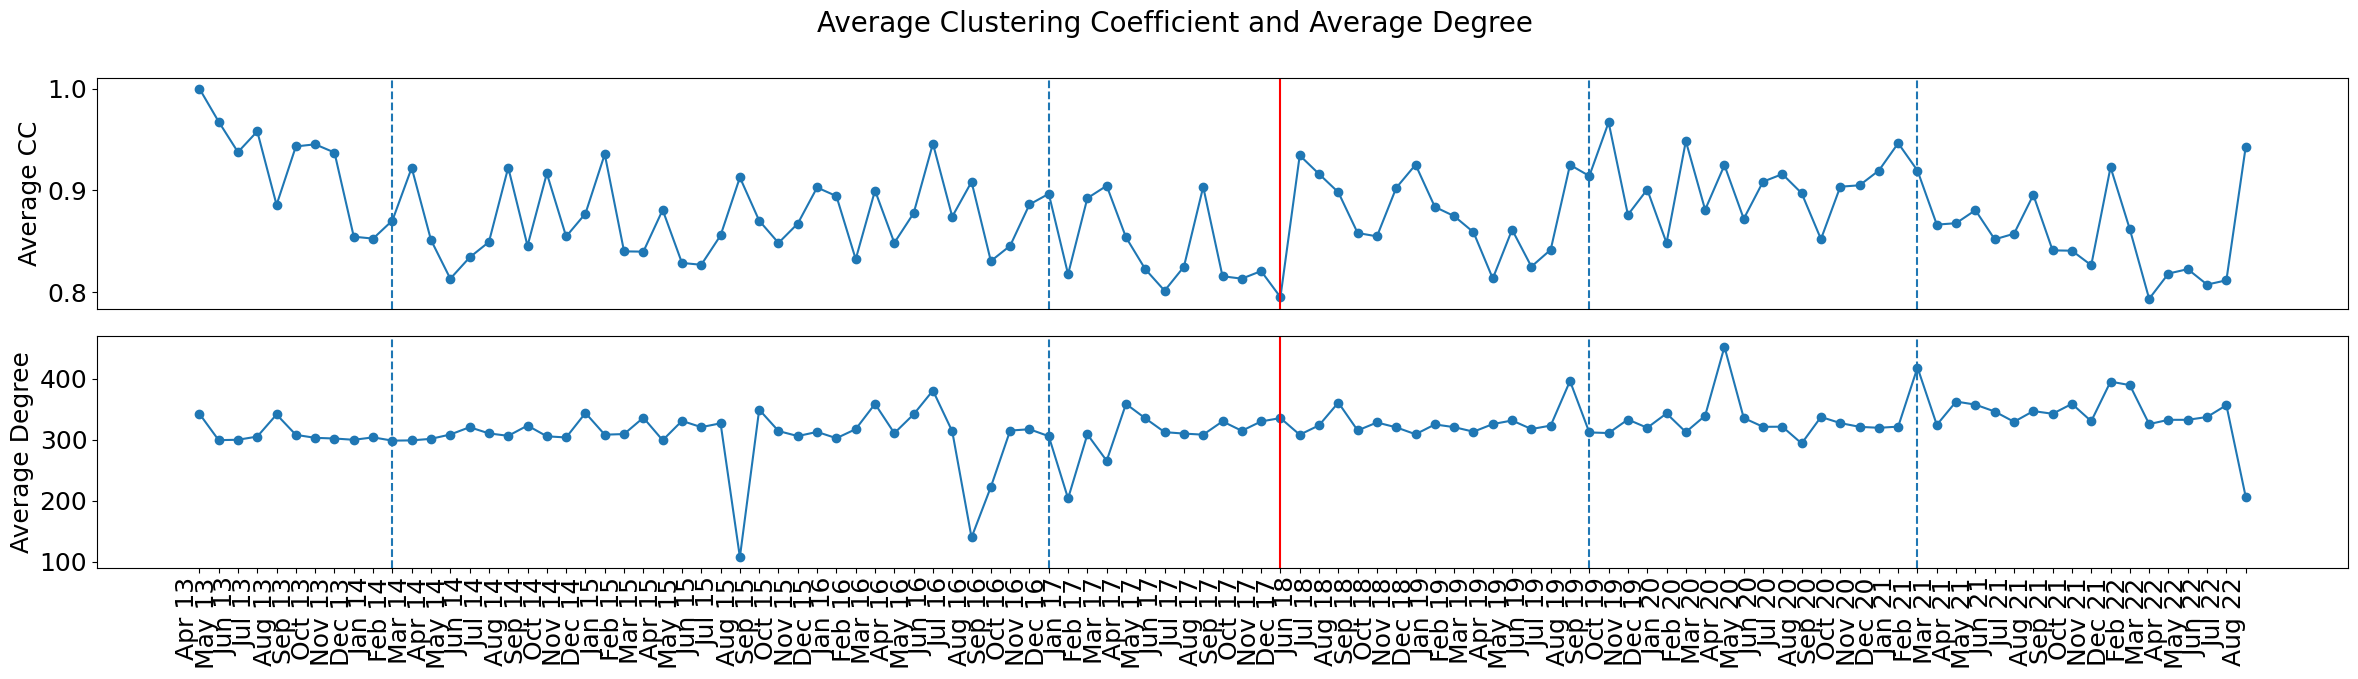

In [105]:
fig = plt.figure(figsize = (24, 7))

ax1 = plt.subplot(211)

plt.suptitle('Average Clustering Coefficient and Average Degree')
plt.ylabel('Average CC')
ax1.plot(m_tot, avg_cc_tot, '-o')
#plt.xticks(rotation=90, ha='right')
ax1.axes.get_xaxis().set_visible(False)
ax1.axvline(x='Feb 14', linestyle = '--')
ax1.axvline(x='Dec 16', linestyle = '--')
ax1.axvline(x='Dec 17', linestyle = '-', color = 'r')
ax1.axvline(x='Sep 19', linestyle = '--')
ax1.axvline(x='Feb 21', linestyle = '--')
plt.tight_layout()
#plt.savefig("dynamic_n_comm_tot.png")
ax2 = plt.subplot(212, sharex = ax1)


plt.ylabel('Average Degree')
plt.plot(m_tot, avg_deg_tot,  '-o')
plt.xticks(rotation=90, ha='right')
plt.axvline(x='Feb 14', linestyle = '--')
plt.axvline(x='Dec 16', linestyle = '--')
plt.axvline(x='Dec 17', linestyle = '-', color = 'r')
plt.axvline(x='Sep 19', linestyle = '--')
plt.axvline(x='Feb 21', linestyle = '--')
plt.tight_layout()

plt.savefig("dynamic_avg_cc_deg_tot.png")